# ENSO (cont'd)

Here, we will do a similar analysis than last week, but focussing on the equatorial Pacific. The dominant process along the equator is upwelling, due to the westward tradewinds pushing surface waters northward in the northern hemisphere, and southward in the southern hemisphere due to the earth rotation, resulting in upwelling of cold water from below along the equator. While that upwelling is easily seen in satellite sea surface temperature images, can we see it in drifter tracks?

The global database of drifter tracks is widely available over the internet; the instructions on how to obtain the data for any region are given at the end of this lecture. We have extracted the data for the area and saved as a cvs file.



In [1]:
import pandas as pd
import numpy as np

drifters = pd.read_csv('/home/ocn463-data/woce/drift/pacdrift.gz', compression='gzip', na_values = -999.99)

In [2]:
drifters

id  month    day  year    lat      lon     sst       u       v  \
0        7702986      3  29.75  1988  2.373  267.958  28.244 -76.816  37.069   
1        7702986      3  30.00  1988  2.442  267.809  28.281 -78.719  32.167   
2        7702986      3  30.25  1988  2.499  267.652  28.063 -78.133  24.650   
3        7702986      3  30.50  1988  2.538  267.505  28.070 -71.856  23.063   
4        7702986      3  30.75  1988  2.589  267.373  28.302 -74.005  27.462   
...          ...    ...    ...   ...    ...      ...     ...     ...     ...   
2244751    90561      3  30.25  2011  9.961  180.135  27.692 -41.105  -1.209   
2244752    90561      3  30.50  2011  9.964  180.069  27.607 -37.501   3.801   
2244753    90561      3  30.75  2011  9.975  179.988  27.594 -36.597   2.026   
2244754    90561      3  31.00  2011  9.972  179.924  27.704 -36.611   4.784   
2244755    90561      3  31.25  2011  9.994  179.843  27.712 -36.054  11.626   

           umag    latvar    lonvar   tempvar  
0        85.293  0.000093  0.000151  0.010206  
1        85.037  0.000008  0.000010  0.003204  
2        81.929  0.000045  0.000065  0.010097  
3        75.467  0.000027  0.000038  0.007007  
4        78.936  0.000047  0.000069  0.006161  
...         ...       ...       ...       ...  
2244751  41.123  0.000006  0.000008  0.004182  
2244752  37.693  0.000003  0.000006  0.004396  
2244753  36.653  0.000008  0.000010  0.003982  
2244754  36.923  0.000022  0.000027  0.004592  
2244755  37.882  0.000008  0.000010  0.004258  

[2244756 rows x 13 columns]

There's a lot more data here than there was in the previous lecture. Let's make a plot of every 100th track

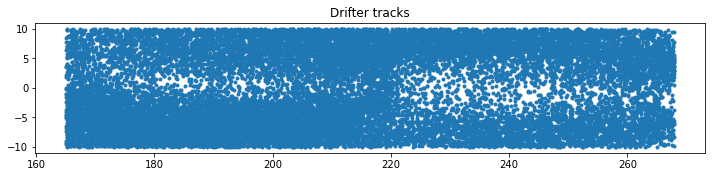

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
ax.plot(drifters['lon'][::100], drifters['lat'][::100], '.')
ax.set_title('Drifter tracks')
ax.set_aspect('equal')

There are some gaps, but we can still see what the currents are like. Let's make boxes of 1/2 degree latitude and all longitudes, and find the average U and V in each box as well as the standard deviation of them.

NOTE: The code block below takes about 5 or 6 minutes to run on our server, so let's NOT ALL RUN AT THE SAME TIME

In [4]:
cenlon, cenlat = np.meshgrid(np.arange(165.5, 267.6, 0.5), np.arange(-9.5, 9.6, 0.5))
Umean = np.nan * np.ones_like(cenlon)
Vmean = np.nan * np.ones_like(cenlon)
Ustd = np.nan * np.ones_like(cenlon)
Vstd = np.nan * np.ones_like(cenlon)

for ilat in range(cenlon.shape[0]):
    for ilon in range(cenlon.shape[1]):
        boxlat = np.where(np.absolute(drifters['lat']-cenlat[ilat, ilon]) < 0.5)[0]
        boxlon = np.where(np.absolute(drifters['lon']-cenlon[ilat, ilon]) < 0.5)[0]
        box = np.array(sorted(set(boxlat) & set(boxlon)))
        Umean[ilat, ilon] = np.nanmean(drifters['u'][box])
        Vmean[ilat, ilon] = np.nanmean(drifters['v'][box])
        Ustd[ilat, ilon] = np.nanstd(drifters['u'][box])
        Vstd[ilat, ilon] = np.nanstd(drifters['v'][box])

In [5]:
cenlon

array([[165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       ...,
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5],
       [165.5, 166. , 166.5, ..., 266.5, 267. , 267.5]])

In [6]:
cenlat

array([[-9.5, -9.5, -9.5, ..., -9.5, -9.5, -9.5],
       [-9. , -9. , -9. , ..., -9. , -9. , -9. ],
       [-8.5, -8.5, -8.5, ..., -8.5, -8.5, -8.5],
       ...,
       [ 8.5,  8.5,  8.5, ...,  8.5,  8.5,  8.5],
       [ 9. ,  9. ,  9. , ...,  9. ,  9. ,  9. ],
       [ 9.5,  9.5,  9.5, ...,  9.5,  9.5,  9.5]])

And now let's plot then

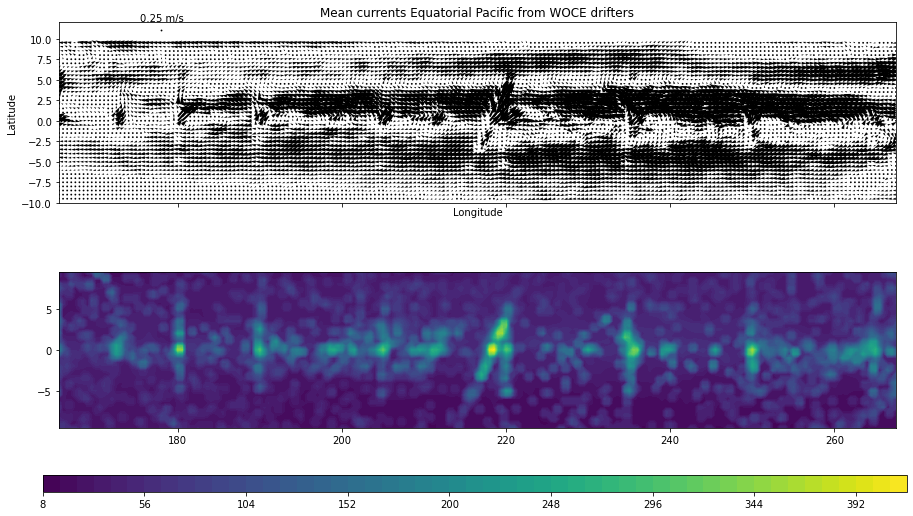

In [7]:
fig, ax = plt.subplots(2,1,figsize=(15,8), sharex=True)
q = ax[0].quiver(cenlon, cenlat, Umean, Vmean)
ax[0].quiverkey(q, 178, 11, 0.25, '0.25 m/s', coordinates='data')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Mean currents Equatorial Pacific from WOCE drifters')
ax[0].set_aspect('equal')
ax[0].set_ylim(-10, 12)
cs = ax[1].contourf(cenlon, cenlat, np.sqrt(Ustd**2 + Vstd**2), levels=50)
ax[1].set_aspect('equal')

cbaxes = fig.add_axes([0.11, 0.05, 0.8, 0.03]) 
cb = plt.colorbar(cs, cax = cbaxes, orientation='horizontal') 


Now let's try making zonal strips

In [8]:
cenlat1 = np.arange(-9.5, 9.6, 0.5)
Umean1 = np.nan * np.ones_like(cenlat1)
Vmean1 = np.nan * np.ones_like(cenlat1)
Ustd1 = np.nan * np.ones_like(cenlat1)
Vstd1 = np.nan * np.ones_like(cenlat1)

for ilat in range(len(cenlat1)):
    strip = np.where(np.absolute(drifters['lat']-cenlat1[ilat]) < 0.5)[0]
    Umean1[ilat] = np.nanmedian(drifters['u'][strip])
    Vmean1[ilat] = np.nanmedian(drifters['v'][strip])
    Ustd1[ilat] = np.nanstd(drifters['u'][strip])
    Vstd1[ilat] = np.nanstd(drifters['v'][strip])

And plot them

Text(0.5, 1.0, 'standard deviation')

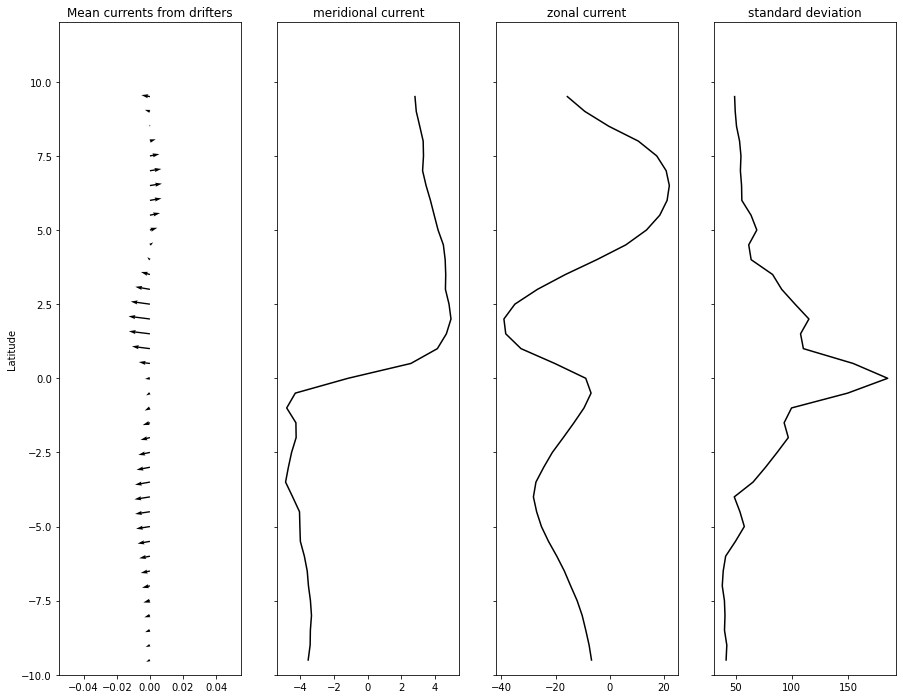

In [10]:
fig, ax = plt.subplots(1,4,figsize=(15,12), sharey=True)
q = ax[0].quiver(np.zeros_like(cenlat1), cenlat1, Umean1, Vmean1)
ax[0].quiverkey(q, -178, 11, 0.25, '0.25 m/s', coordinates='data')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Mean currents from drifters')
#ax[0].set_aspect('equal')
ax[0].set_ylim(-10, 12)
cs = ax[1].plot(Vmean1, cenlat1, 'k')
ax[1].set_title('meridional current')
cs = ax[2].plot(Umean1, cenlat1, 'k')
ax[2].set_title('zonal current')
cs = ax[3].plot(np.sqrt(Ustd1**2+Vstd1**2), cenlat1, 'k')
ax[3].set_title('standard deviation')

# Pacific Variability- ENSO

There are several different indices for ENSO: https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni.

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)

We use the Nino 3.4 index. The data are easily found online:

In [11]:
ninocols = ['year', 'month', 'sst', 'ssta', 'anom']
nino = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt', 
                    names=ninocols, delim_whitespace=True, skiprows=1)

In [12]:
nino

year  month    sst   ssta  anom
0    1950      1  24.56  26.18 -1.62
1    1950      2  25.07  26.39 -1.32
2    1950      3  25.88  26.95 -1.07
3    1950      4  26.29  27.39 -1.11
4    1950      5  26.19  27.56 -1.37
..    ...    ...    ...    ...   ...
861  2021     10  25.77  26.72 -0.94
862  2021     11  25.76  26.70 -0.94
863  2021     12  25.54  26.60 -1.07
864  2022      1  25.60  26.55 -0.95
865  2022      2  25.87  26.76 -0.89

[866 rows x 5 columns]

We need to fix the date; simplest way forward is:

In [13]:
date = nino['year'] + nino['month']/12

Let's plot all the temperatures and anomalies, using the sharex argumnet to clean up the x-axes.

Text(0.5, 1.0, 'Nino 3.4 anomalies')

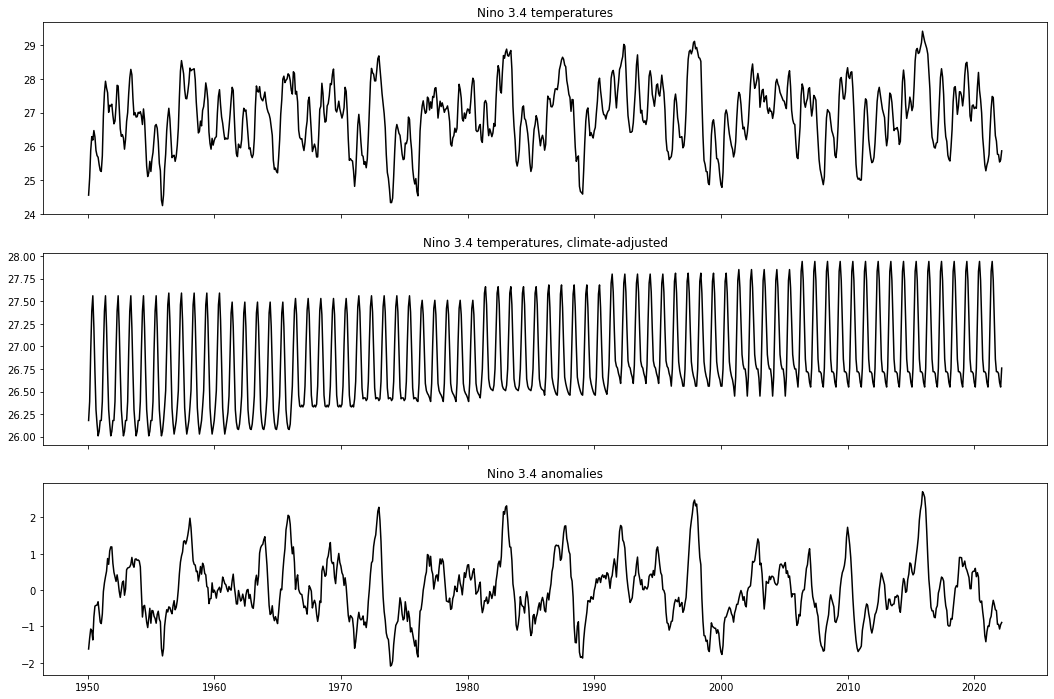

In [14]:
fig, ax = plt.subplots(3,1,figsize=(18,12), sharex=True)
ax[0].plot(date, nino['sst'], 'k')
ax[0].set_title('Nino 3.4 temperatures')
ax[1].plot(date, nino['ssta'], 'k')
ax[1].set_title('Nino 3.4 temperatures, climate-adjusted')
ax[2].plot(date, nino['anom'], 'k')
ax[2].set_title('Nino 3.4 anomalies')

Let's zoom on last 30 years

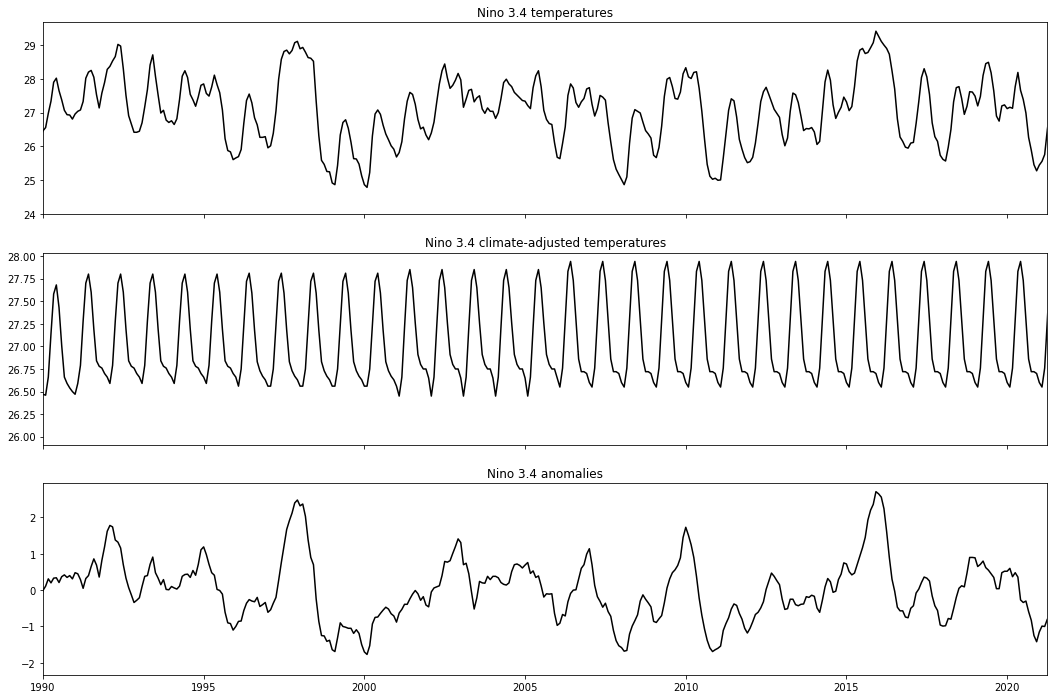

In [15]:
fig, ax = plt.subplots(3,1,figsize=(18,12), sharex=True)
ax[0].plot(date, nino['sst'], 'k')
ax[0].set_title('Nino 3.4 temperatures')
ax[1].plot(date, nino['ssta'], 'k')
ax[1].set_title('Nino 3.4 climate-adjusted temperatures')
ax[2].plot(date, nino['anom'], 'k')
ax[2].set_title('Nino 3.4 anomalies')
for axis in ax:
    axis.set_xlim(1990, 2021.25)

Below is the code used to make the drifter file; you do not need to run it, but if you want to get a different sub-set of the data, you can change it to a code cell, modify it, and use it.